Mamy dataset zakładów bukmacherskich za lata 2009-2012 zrobiąnych po linii Pinnacle jednym syndykatem.

Glosariusz:
- Opening odds (op, OP) - linii otwarcia (czas, gdy bukmacher dopiero otwiera kursy na mecz)
- Closing odds (cl, CL) - linia zamknięcia (kursy za >4 min do początku meczu)
- WIN1 - zwycięstwo gospodarze
- X - remis
- WIN2 - zwycięstwo gości


WIN2OP/WIN2CL - to kursy linii otwarcia i linii zamknięcia na zwycięstwo gości odpowiednie.

In [37]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/home/obl/cdvprojects/bets/baza.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37853 entries, 0 to 37852
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          37853 non-null  int64  
 1   Date          37853 non-null  object 
 2   Country       37853 non-null  object 
 3   Tournament    37853 non-null  object 
 4   Match         37853 non-null  object 
 5   Opening odds  37853 non-null  float64
 6   XOP           37853 non-null  float64
 7   WIN2-op       37853 non-null  float64
 8   Closing odds  37853 non-null  float64
 9   XCL           37853 non-null  float64
 10  WIN2-cl       37853 non-null  float64
 11  HT            37831 non-null  object 
 12  FT            37853 non-null  object 
 13  TOTAL FT      37853 non-null  int64  
 14  HTG1          37831 non-null  float64
 15  HTG2          37831 non-null  float64
 16  FTG1          37853 non-null  int64  
 17  FTG2          37853 non-null  int64  
 18  BET1          37853 non-nu

Wykorzystujemy funkcje opisu kursów po linii otwarcia i zamknięcia. Widzimy, że średnia na WIN1 - 2,539 po linii otwarcia a 2,559 po linii zamknięcia. Oraz bliżej do meczu rośnie odchylenie standardowe.

In [6]:
df['Opening odds'].describe()

count    37853.000000
mean         2.539868
std          1.516585
min          1.040000
25%          1.770000
50%          2.160000
75%          2.740000
max         47.000000
Name: Opening odds, dtype: float64

In [7]:
df['Closing odds'].describe()

count    37853.000000
mean         2.559418
std          1.542020
min          1.040000
25%          1.750000
50%          2.170000
75%          2.790000
max         37.660000
Name: Closing odds, dtype: float64

W linii na WIN2 i X też widzimy tendencje wzrostu średniego kursu i odchylenia standardowego bliżej do startu meczu. To świadczy o tym, że "margin" bukmachera spada, ponieważ wynik meczu bliżej do jego początku staje się więcej przewidywalny.

In [8]:
df['XOP'].describe()

count    37853.000000
mean         3.802653
std          0.872065
min          1.540000
25%          3.370000
50%          3.550000
75%          3.900000
max         26.500000
Name: XOP, dtype: float64

In [9]:
df['WIN2-op'].describe()

count    37853.000000
mean         4.514737
std          3.156805
min          1.020000
25%          2.760000
50%          3.640000
75%          5.090000
max         44.620000
Name: WIN2-op, dtype: float64

In [10]:
df['WIN2-cl'].describe()

count    37853.000000
mean         4.590013
std          3.349210
min          1.070000
25%          2.730000
50%          3.660000
75%          5.280000
max         56.000000
Name: WIN2-cl, dtype: float64

Właśnie o tym świadczy opis kolumn z "margin", gdzie "mean" zamknięcia niżej za "mean" otwarcia. Ogólnie to widzimy, że "margin" na football w linii Pinnacle zwykle niżej 3%, a bliżej do meczu praktycznie połowa kursów z "margin" niżej 2,5%.

In [51]:
df['MarginOP'].describe()

count    37853.000000
mean         2.917134
std          1.137406
min        -79.887613
25%          2.553682
50%          2.985052
75%          3.130203
max         69.117647
Name: MarginOP, dtype: float64

In [52]:
df['MarginCL'].describe()

count    37853.000000
mean         2.646522
std          0.745067
min          0.004635
25%          2.116663
50%          2.512910
75%          2.964830
max         22.040059
Name: MarginCL, dtype: float64

Spójrzmy na "margin" w różnych ligach w linii otwarcia. Widzimy, że włoska Seria A ma najmniejszy "margin", co jest trochę ciekawym dla głębszego badania, biorąc pod uwagę sytuacje z Juventusem 2006 roku oraz reguły gry włoskiego menedżerów. Tak że widzimy, że w tej kategorii są Skandynawia ta Niemcy gdzie na 99,9% ciężko zrobić "match fixing" nawet w regionalnych ligach.

In [58]:
leaguemargin = df.groupby('Tournament')[['MarginOP']].mean()
leaguemargin.sort_values('MarginOP',ascending=True)[:50]

,MarginOP
Tournament,
serie-a-2012-2013,2.023726
serie-a-2011-2012,2.051933
serie-a-2010-2011,2.136468
serie-a-2009-2010,2.148672
veikkausliiga-2009,2.236222
2-bundesliga-2011-2012,2.244298
tippeligaen-2009,2.269438
bundesliga-2012-2013,2.323632
bundesliga-2011-2012,2.372986


In [ ]:
W linii zamknięcia włochy już nie mają pierwszeństwa. 

In [59]:
leaguemargin = df.groupby('Tournament')[['MarginCL']].mean()
leaguemargin.sort_values('MarginCL',ascending=True)[:50]

,MarginCL
Tournament,
2-bundesliga-2011-2012,1.932187
serie-a-2012-2013,2.056112
championship-2011-2012,2.087618
2-bundesliga-2009-2010,2.087749
ligue-1-2012-2013,2.091252
championship-2012-2013,2.109416
serie-a-2011-2012,2.111739
championship-2010-2011,2.115700
allsvenskan-2011,2.133931


Dla ciekawostki sprawdźmy, jaką była ilość udanych strzałów w ligach. Oczywiście, że wybiórka meczów z każdej ligi jest mała dla jakichkolwiek wniosków, ale tutaj można znaleźć ciekawy mit o południowoamerykańskich ligach:

Niby wiadomo, że tam grają w bardzo atakujący football, ale na praktyce tak się dzieje tylko w niektórych miejscowościach Brazylii. Tutaj widzimy potwierdzenie tego, że w "prim-b-metropolitana", "primera-b-nacional" i "campeonato-brasileiro" było mniej niż 2,5 bramek za mecz (wtedy jak średnia ilość w świecie to 2,6-2,7 bramek). Scouting oddziały już dawno to znają, ale w głowach kibiców jeszcze istnieje ten mit o Południowej Ameryce.

In [62]:
leaguemargin = df.groupby('Tournament')[['TOTAL FT']].mean()
leaguemargin.sort_values('TOTAL FT',ascending=True)[:50]

,TOTAL FT
Tournament,
2-bundesliga-2009-2010,1.500000
challenge-league-2009-2010,1.500000
prim-b-metropolitana-2011-2012,2.000000
primera-b-nacional-2010-2011,2.127273
1-hnl-2010-2011,2.178218
super-league-2012-2013,2.181818
primera-b-nacional-2012-2013,2.183099
ekstraklasa-2011-2012,2.195833
primera-b-nacional-2011-2012,2.199446


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37853 entries, 0 to 37852
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          37853 non-null  int64  
 1   Date          37853 non-null  object 
 2   Country       37853 non-null  object 
 3   Tournament    37853 non-null  object 
 4   Match         37853 non-null  object 
 5   Opening odds  37853 non-null  float64
 6   XOP           37853 non-null  float64
 7   WIN2-op       37853 non-null  float64
 8   Closing odds  37853 non-null  float64
 9   XCL           37853 non-null  float64
 10  WIN2-cl       37853 non-null  float64
 11  HT            37831 non-null  object 
 12  FT            37853 non-null  object 
 13  TOTAL FT      37853 non-null  int64  
 14  HTG1          37831 non-null  float64
 15  HTG2          37831 non-null  float64
 16  FTG1          37853 non-null  int64  
 17  FTG2          37853 non-null  int64  
 18  BET1          37853 non-nu

W datasecie mamy kolumny 'WIN1OP', 'XOP.1', 'WIN2OP', 'WIN1CL', 'XCL.1', 'WIN2CL'. Kolumna 'WIN1OP' zawiera formule: ('W1' - 1). Natomiast kolumna 'W1' zawiera formulę: ('Opening odds' * BET1). W 'BET 1' są tylko dane 1 - wygrasz i 0 - przegrasz. Na końcu w kolumnie 'WIN1OP' w razie wygrania otrzymujemy czysty zysk, a w razie przegrania mamy -1. Czyli po prostu odejmujemy zysk od ilości zrobionych zakładów. Dla innych kolumn formułę są zrobione w ten sam sposób.

Teraz sprawdźmy, co będzie, gdy na każdy mecz z datasetu robić zakłady w kwocie 1 zł na jeden mecz po kolei. Czyli w przykładzie #1 róbmy zakłady tylko na WIN1 w linii otwarcia.

In [74]:
#1
df['WIN1OP'].sum()
#otzymaliśmy negatywny wynik i przegrali 670 zł. 
#Jeżeli robić zakłady w kwocie 100 zł, to bym dostaliśmy -6701 zł

-670.1800000000002

In [66]:
df['XOP.1'].sum()

-1484.98

In [68]:
df['WIN2OP'].sum()

-1312.8100000000002

In [69]:
df['WIN1CL'].sum()

-709.73

In [70]:
df['XCL.1'].sum()

-1319.3600000000001

In [71]:
df['WIN2CL'].sum()

-1308.9599999999996

Jeżeli robić zakłady tylko na jakiś konkretny wynik w sposób fiksowanej sumy na każdy mecz, to wszędzie otrzymamy negatywny wynik i stracimy pieniądze. Właśnie to jest w miare proste określenie tego, jak pracuję "margin" bukmachera.

Wniosek: żeby wygrać u bukmachera trzeba koniecznie brać pod uwagę "margin" i znać, w jaki okres pomiędzy otwarciem i zamknięciem wchodzić na rynek, ale to już kwestia innego badania.

Ogólny wniosek: na podstawie zbioru >37000 już można zrobić w miarę prawdziwy wniosek o tym, że niemożliwe jest wygrać u bukmachera nie biorąc pod uwagę "margin", który on zakłada. Także taka ilość danych potwierdza, że bliżej do meczu sytuacja wokół tego meczu jest bardziej przewidywalna i dlatego bukmacher zmniejsza "margin", zwiększając kursy na mecz.

Oraz udało się zobaczyć, że jeżeli robić fiksowane zakłady w rozmiarze 1 unit na jeden i tylko jeden wynik (na przykład WIN1), to na dystancji 37000-38000 meczów najmniej pieniądze będzie przegranę, jeżeli wybierać zwycięstwo gospodarze meczu. Różnicy pomiędzy remisem a zwycięstwom gości praktycznie nie ma.

Tak że na podstawie tego datasetu udało się znaleźć przykład bardziej z samej kuchni piłki nożnej w postaci bramek w południowej Ameryce.

Co jeszcze można zrobić z tym datasetem?
1. Randomizowaną symulację dystansu w okresie podanej ilości meczów, żeby zobaczyć, ile podejść ze 100 daje pozytywny ROI.
2. Zbadać sposób gry tego syndykatu.
3. Dostać szczegóły kursów i wyników z każdej ligi/kraju.
4. Szczegółowo rozebrać jak działa "margin" Pinnacle.

Na koniec w postaci ciekawostki trochę wizualizacji.

Mamy viz, że większość kursów układają się w próg do 10 na wynik.

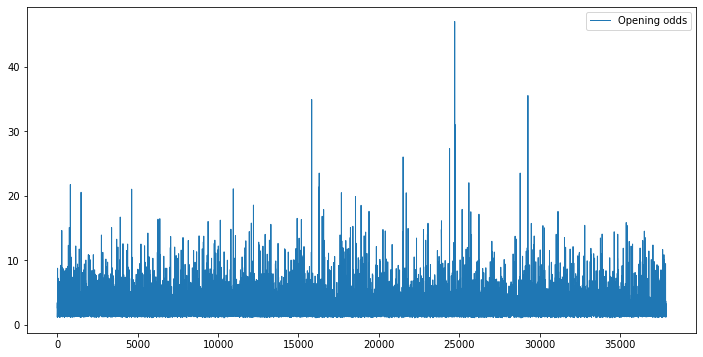

In [38]:
df.plot.line(y='Opening odds', figsize = (12,6), lw=1)

Porównamy rozbieżność kursów pomiędzy otwarciem i zamknięciem. Widzimy, że było 4 meczę, w których kurs na otwarciu był jak minimum wyżej 5, a w moment zamknięcia linii był już mniej 2.

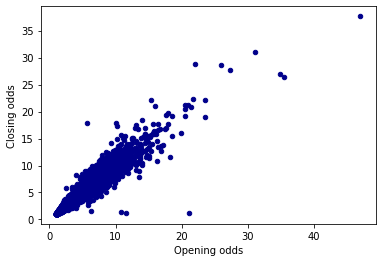

In [15]:
df.plot.scatter(x='Opening odds', y='Closing odds', c='DarkBlue')

Na remisy podobnej anomalii już nie było.

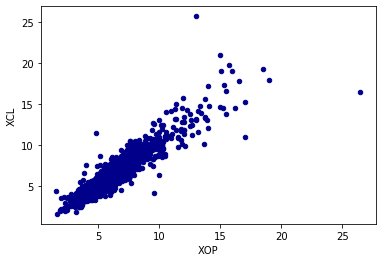

In [16]:
df.plot.scatter(x='XOP', y='XCL', c='DarkBlue')

A na WIN2 widzimy, że najbardziej wysoką rozbieżność w ocenie wiarogodności zwycięstwa.

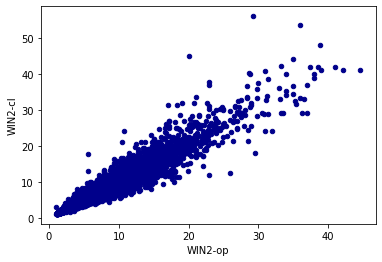

In [18]:
df.plot.scatter(x='WIN2-op', y='WIN2-cl', c='DarkBlue')